I want to state that this is just an introduction to using basic linear regression with Scikit Learn or sklearn, and by no means is it the "best" project I can do. I tried to have a big variety of projects. This is mostly me trying to show my ability to explain a project and a code.

This dataset Salary_Data.csv only has 2 columns "YearsExperience" and "Salary" and only 30 instances. We are going to use the classical TEST-TRAIN split with 1/6 of the dataset dedicated to the testing part.

The aim is to predict the salary using one variable which is the number of years of experience.

In [ ]:
# Import csv file on colab

import io
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (2).csv


In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

First we need to open the uploaded CSV file with pandas using read_csv().

Now let's see what our data looks like (always a good idea):

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['Salary_Data.csv'].decode('utf-8')))
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


When looking at the data, we first notice that luckily there are no missing values that we would need to take care of. Then we notice how the experience was ranked in ascending order. This will be a problem when we will make our model because if we only take the first 25 to create it, we will miss bigger values in the training set. The best way to remove this bias is simply by shuffling the data.

In [ ]:
# Shuffle the data
df = shuffle(df)
print(df)

    YearsExperience    Salary
24              8.7  109431.0
0               1.1   39343.0
18              5.9   81363.0
2               1.5   37731.0
21              7.1   98273.0
15              4.9   67938.0
9               3.7   57189.0
20              6.8   91738.0
27              9.6  112635.0
12              4.0   56957.0
29             10.5  121872.0
19              6.0   93940.0
10              3.9   63218.0
25              9.0  105582.0
8               3.2   64445.0
11              4.0   55794.0
13              4.1   57081.0
28             10.3  122391.0
23              8.2  113812.0
7               3.2   54445.0
6               3.0   60150.0
1               1.3   46205.0
4               2.2   39891.0
16              5.1   66029.0
22              7.9  101302.0
5               2.9   56642.0
14              4.5   61111.0
17              5.3   83088.0
3               2.0   43525.0
26              9.5  116969.0


Much better !

Next, we seperate the column 'Salary' that is going to be predicted from the column containing the unique variable 'YearsExperience'. We can verify if it has been done correctly by looking at the shape of the matrices. 

Here, we get two vectors of the same size. In a more concrete case were we would have multiple variables for prediction, salary_X would be a matrix with the number of instances (cases) and the number of variables.

In [ ]:
salary_X = pd.DataFrame(df, columns= ['YearsExperience'])
salary_y = pd.DataFrame(df, columns= ['Salary'])
print(salary_X.shape)
print(salary_y.shape)

(30, 1)
(30, 1)


Now that we have our two matrices, we need to seperate the part that we are going to need for the training and the one for testing the accuracy. For training we will take 5/6 of the data, so 25 instances in our case and the 5 left instances will be for testing the accuracy of the model that we created.

In [ ]:
salary_X_train = salary_X[:-5]
salary_X_test = salary_X[-5:]

salary_y_train = salary_y[:-5]
salary_y_test = salary_y[-5:]

It's finally time to create our model !  

We use the function LinearRegression() that was imported from the package sklearn.linear_model

In [ ]:
lr_model = linear_model.LinearRegression()

Now let's use our model lr_model by applying it on the seperated "matrices" that we created just before.

We also will have to obtain the results that the model gives us for the testing set so that we can compare the obtained values with the real ones!


In [ ]:
# Training the model with lr_model
lr_model.fit(salary_X_train, salary_y_train)

# Generate predictions 
y_predictions = lr_model.predict(salary_X_test)


Let's get the mean squared error to see how many errors we got as well as the coefficient of determination (or accuracy) of our simple model :

In [ ]:

# Mean squared error
print('Mean sq error: %.2f' %mean_squared_error(salary_y_test, y_predictions))

print('Coefficient of determination: %.2f' %r2_score(salary_y_test, y_predictions))

Mean sq error: 24160197.04
Coefficient of determination: 0.96


Here we have a plot of the 25 points with the model.

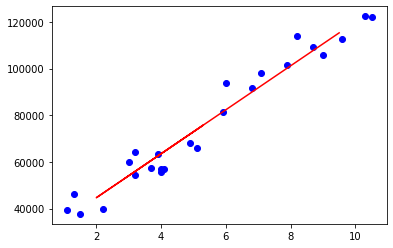

In [ ]:
plt.scatter(salary_X_train, salary_y_train, color='blue')
plt.plot(salary_X_test, y_predictions, color='red')
plt.show()

Here is the linear model and the prediction it gave for the points in the testing set.

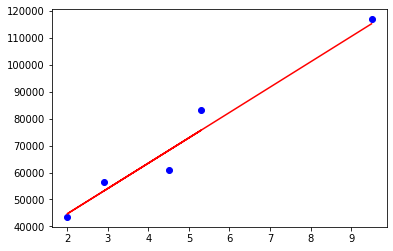

In [ ]:
plt.scatter(salary_X_test, salary_y_test, color='blue')
plt.plot(salary_X_test, y_predictions, color='red')
plt.show()